<a href="https://colab.research.google.com/github/thaais-souza/AmigoSecreto/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

In [12]:
with open('TelecomX_Data.json', 'r') as file:
    data = json.load(file)
df = pd.DataFrame(data)
print("Primeiras 5 linhas do dataset:")
print(df.head())


Primeiras 5 linhas do dataset:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber o

#🔧 Transformação

In [16]:
if not df.empty:
    print("\nProcessando os dados...")
     # 1. Converter a coluna Churn para numérica (Yes=1, No=0)
    df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
    # 2. Extrair informações das colunas aninhadas
    # Para a coluna 'customer'
    customer_data = pd.json_normalize(df['customer'])
    customer_data.columns = ['customer_' + col for col in customer_data.columns]

    # Para a coluna 'phone'
    phone_data = pd.json_normalize(df['phone'])
    phone_data.columns = ['phone_' + col for col in phone_data.columns]

    # Para a coluna 'internet'
    internet_data = pd.json_normalize(df['internet'])
    internet_data.columns = ['internet_' + col for col in internet_data.columns]

    # Para a coluna 'account'
    account_data = pd.json_normalize(df['account'])
    account_data.columns = ['account_' + col for col in account_data.columns]
    # 3. Juntar tudo em um único DataFrame
    df_final = pd.concat([df, customer_data, phone_data, internet_data, account_data], axis=1)

    # 4. Remover as colunas originais com dados aninhados
    df_final = df_final.drop(['customer', 'phone', 'internet', 'account'], axis=1)

    print("Dados processados com sucesso!")
    print("\nPrimeiras 3 linhas do dataset processado:")
    print(df_final.head(3))
    print("\nColunas disponíveis:")
    print(df_final.columns.tolist())


Processando os dados...
Dados processados com sucesso!

Primeiras 3 linhas do dataset processado:
   customerID Churn  Churn_numeric customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO    No              0          Female                       0   
1  0003-MKNFE    No              0            Male                       0   
2  0004-TLHLJ   Yes              1            Male                       0   

  customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
0              Yes                 Yes                9                Yes   
1               No                  No                9                Yes   
2               No                  No                4                Yes   

  phone_MultipleLines  ... internet_OnlineBackup internet_DeviceProtection  \
0                  No  ...                   Yes                        No   
1                 Yes  ...                    No                        No   
2                  No  ...               

#📊 Carga e análise

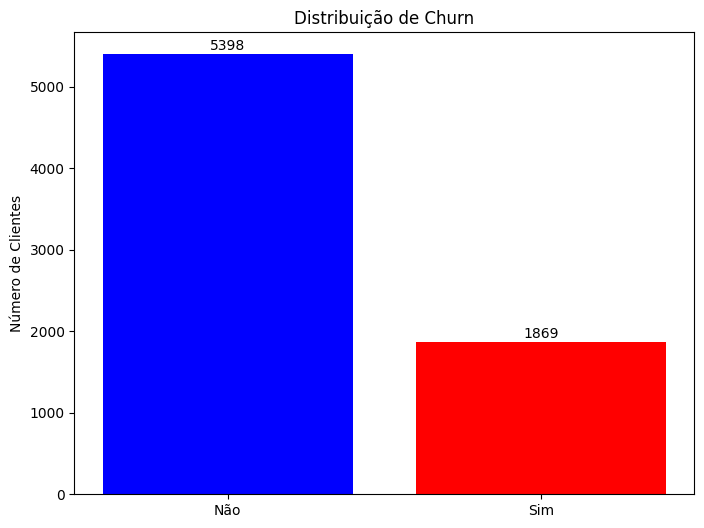

Taxa de Churn: 25.72%


In [20]:
# 1. Taxa de Churn
plt.figure(figsize=(8, 6))
churn_counts = df_final['Churn_numeric'].value_counts()
plt.bar(['Não', 'Sim'], churn_counts.values, color=['blue', 'red'])
plt.title('Distribuição de Churn')
plt.ylabel('Número de Clientes')

# Adicionar valores nas barras
for i, count in enumerate(churn_counts.values):
    plt.text(i, count + 50, str(count), ha='center')

plt.show()

taxa_churn = (df_final['Churn_numeric'].mean() * 100).round(2)
print(f"Taxa de Churn: {taxa_churn}%")


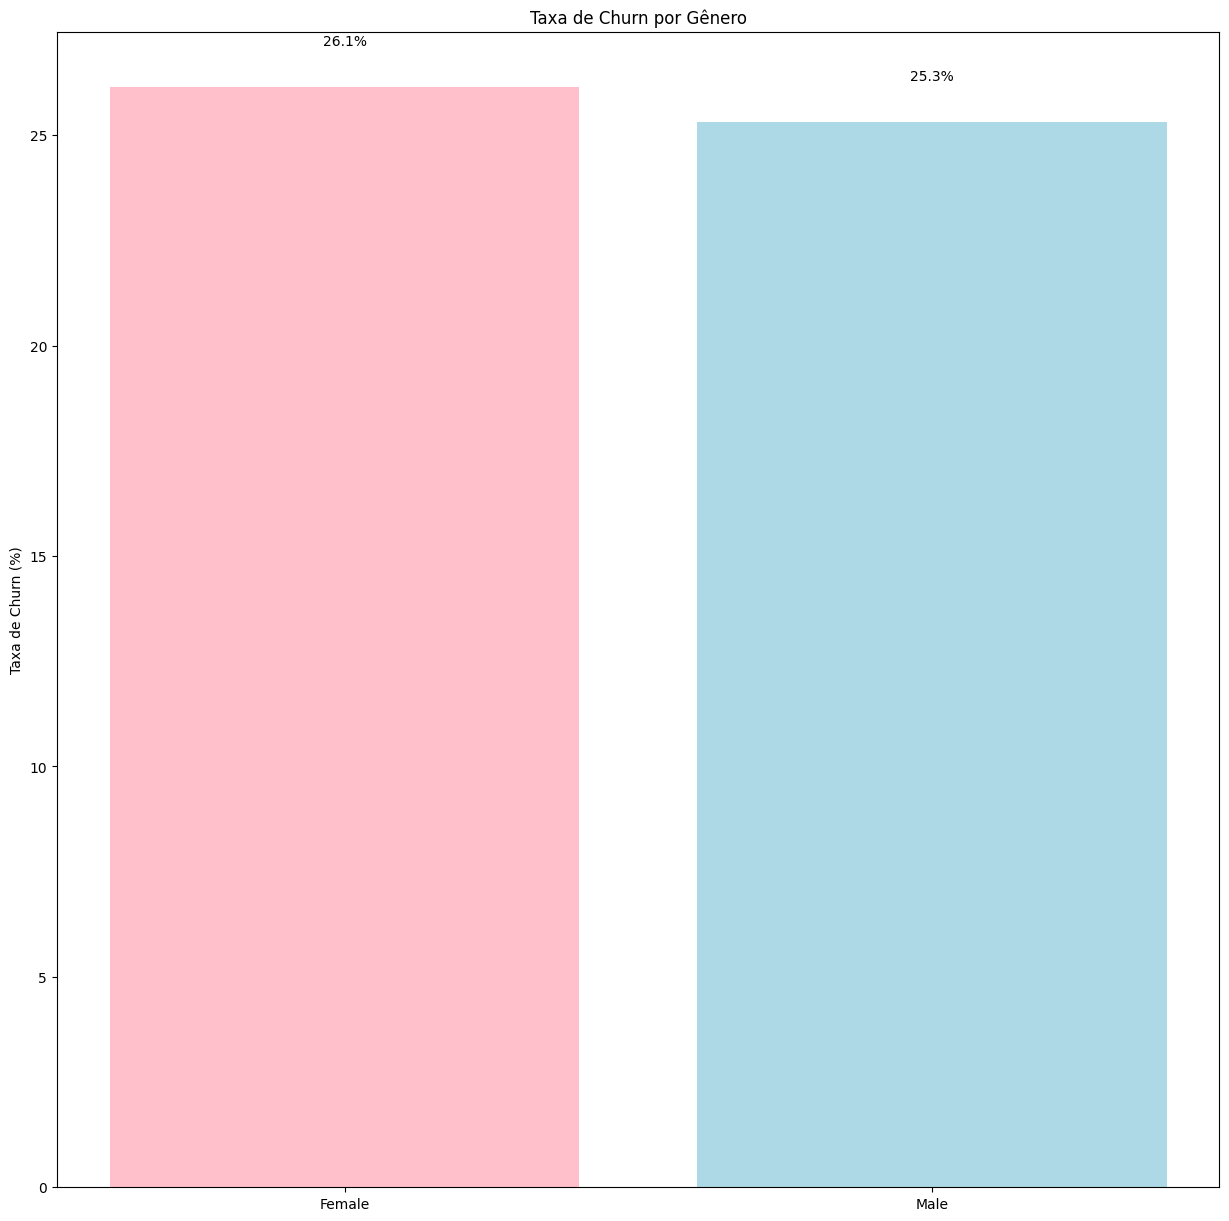

In [37]:
# 2. Churn por Gênero
if 'customer_gender' in df_final.columns:
    plt.figure(figsize=(15, 15))
    churn_gender = df_final.groupby('customer_gender')['Churn_numeric'].mean() * 100
    plt.bar(churn_gender.index, churn_gender.values, color=['pink', 'lightblue'])
    plt.title('Taxa de Churn por Gênero')
    plt.ylabel('Taxa de Churn (%)')

    # Adicionar valores nas barras
    for i, value in enumerate(churn_gender.values):
        plt.text(i, value + 1, f"{value:.1f}%", ha='center')

    plt.show()


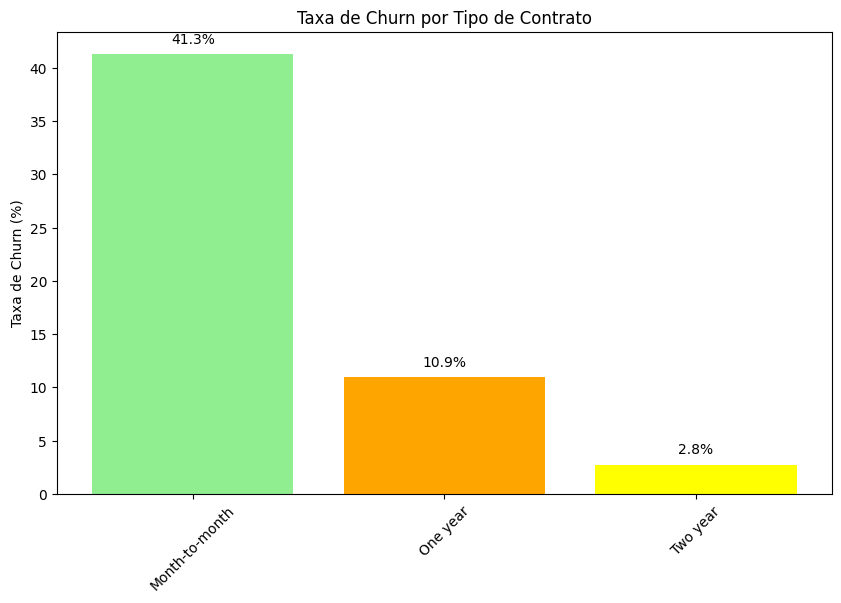

In [40]:
# 3. Churn por Tipo de Contrato
if 'account_Contract' in df_final.columns:
    plt.figure(figsize=(10, 6))
    churn_contract = df_final.groupby('account_Contract')['Churn_numeric'].mean() * 100
    plt.bar(churn_contract.index, churn_contract.values, color=['lightgreen', 'orange', 'yellow'])
    plt.title('Taxa de Churn por Tipo de Contrato')
    plt.ylabel('Taxa de Churn (%)')
    plt.xticks(rotation=45)

    # Adicionar valores nas barras
    for i, value in enumerate(churn_contract.values):
        plt.text(i, value + 1, f"{value:.1f}%", ha='center')

    plt.show()


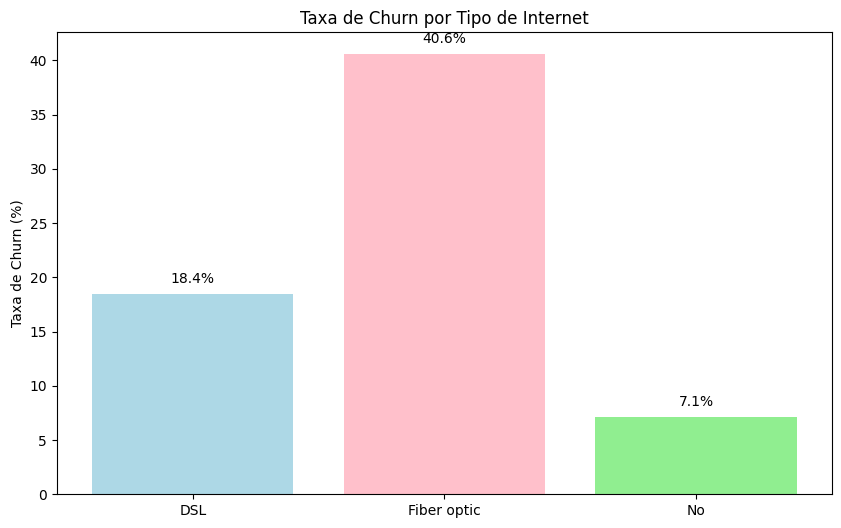

In [41]:
# 4. Churn por Serviço de Internet
if 'internet_InternetService' in df_final.columns:
    plt.figure(figsize=(10, 6))
    churn_internet = df_final.groupby('internet_InternetService')['Churn_numeric'].mean() * 100
    plt.bar(churn_internet.index, churn_internet.values, color=['lightblue', 'pink', 'lightgreen'])
    plt.title('Taxa de Churn por Tipo de Internet')
    plt.ylabel('Taxa de Churn (%)')

    # Adicionar valores nas barras
    for i, value in enumerate(churn_internet.values):
            plt.text(i, value + 1, f"{value:.1f}%", ha='center')

    plt.show()

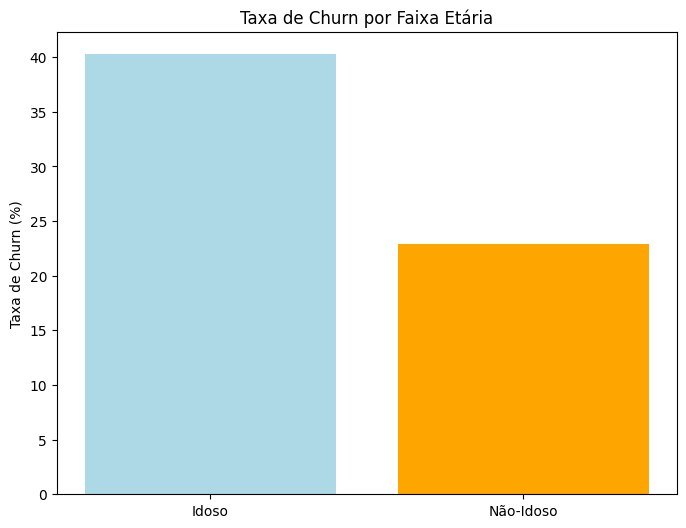

In [42]:
# 5. Churn por Idoso (Senior Citizen)
if 'customer_SeniorCitizen' in df_final.columns:
        plt.figure(figsize=(8, 6))
        # Converter para texto para melhor legenda
        df_final['Senior_Text'] = df_final['customer_SeniorCitizen'].apply(lambda x: 'Idoso' if x == 1 else 'Não-Idoso')
        churn_senior = df_final.groupby('Senior_Text')['Churn_numeric'].mean() * 100
        plt.bar(churn_senior.index, churn_senior.values, color=['lightblue', 'orange'])
        plt.title('Taxa de Churn por Faixa Etária')
        plt.ylabel('Taxa de Churn (%)')

#📄Relatorio Final

In [44]:
print("\n" + "="*50)
print("RELATÓRIO FINAL - ANÁLISE DE CHURN")
print("="*50)
print(f"\n1. Taxa geral de evasão: {taxa_churn}%")


RELATÓRIO FINAL - ANÁLISE DE CHURN

1. Taxa geral de evasão: 25.72%


In [46]:
print("\n2. Principais fatores que influenciam a evasão:")

if 'account_Contract' in df_final.columns:
    contract_churn = df_final.groupby('account_Contract')['Churn_numeric'].mean() * 100
    worst_contract = contract_churn.idxmax()
    worst_rate = contract_churn.max()
    print(f"   - Clientes com contrato '{worst_contract}' têm a maior taxa de evasão: {worst_rate:.1f}%")

if 'internet_InternetService' in df_final.columns:
    internet_churn = df_final.groupby('internet_InternetService')['Churn_numeric'].mean() * 100
    worst_internet = internet_churn.idxmax()
    worst_rate = internet_churn.max()
    print(f"   - Clientes com internet '{worst_internet}' têm a maior taxa de evasão: {worst_rate:.1f}%")

if 'customer_SeniorCitizen' in df_final.columns:
    senior_churn = df_final.groupby('customer_SeniorCitizen')['Churn_numeric'].mean() * 100
    if 1 in senior_churn.index and 0 in senior_churn.index:
        senior_rate = senior_churn[1]
        non_senior_rate = senior_churn[0]
        print(f"   - Clientes idosos têm taxa de evasão de {senior_rate:.1f}%, contra {non_senior_rate:.1f}% dos não-idosos")

print("\n3. RECOMENDAÇÕES:")
print("   - Focar em reter clientes com contratos mensais")
print("   - Melhorar a qualidade do serviço de fibra ótica")
print("   - Criar programas de fidelidade para clientes idosos")
print("   - Oferecer descontos para clientes com múltiplos serviços")

print("\n4. PRÓXIMOS PASSOS:")
print("   - Analisar o impacto dos diferentes serviços na retenção")
print("   - Estudar a satisfação dos clientes com fibra ótica")
print("   - Desenvolver campanhas direcionadas para os grupos de maior risco")



2. Principais fatores que influenciam a evasão:
   - Clientes com contrato 'Month-to-month' têm a maior taxa de evasão: 41.3%
   - Clientes com internet 'Fiber optic' têm a maior taxa de evasão: 40.6%
   - Clientes idosos têm taxa de evasão de 40.3%, contra 22.9% dos não-idosos

3. RECOMENDAÇÕES:
   - Focar em reter clientes com contratos mensais
   - Melhorar a qualidade do serviço de fibra ótica
   - Criar programas de fidelidade para clientes idosos
   - Oferecer descontos para clientes com múltiplos serviços

4. PRÓXIMOS PASSOS:
   - Analisar o impacto dos diferentes serviços na retenção
   - Estudar a satisfação dos clientes com fibra ótica
   - Desenvolver campanhas direcionadas para os grupos de maior risco
